# **Persiapan Data**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

## Menampilkan Isi  Dataset

In [10]:
data = pd.read_csv('Dataset1B.csv')
display(data)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,Piknik Słowo - Word Snack,122845,1.0 M,4.67,0.1,0.3,0.0,GAME WORD,96954,17233,5098,1249,2309,False
1726,97,Wordox – Free multiplayer word game,120476,1.0 M,4.21,0.0,0.1,0.0,GAME WORD,74010,21546,10648,4710,9560,False
1727,98,4 Fotos 1 Palavra,114852,5.0 M,4.52,0.3,0.6,0.0,GAME WORD,84688,16783,6619,1867,4892,False
1728,99,زوايا - لعبة ستحرك زوايا عقلك,110293,1.0 M,4.76,0.8,1.9,0.0,GAME WORD,99168,3528,3258,1059,3278,False


In [11]:
data.shape

(1730, 15)

## Membuat Fungsi untuk mengconvert kolom/fitur install menjadi satuan ratusan ribu (K)

In [12]:
def toFloat(val):
  num, ket = val.split()
  if ket == 'M':
    return float(num) * 10**3
  return float(num)

## Menyimpan parameter-parameter yang akan dianalisis ke dalam variabel dan membuat dataframe yang isinya parameter-parameter numerik tersebut

In [13]:
install = data["installs"].apply(toFloat)
great = data[["5 star ratings","4 star ratings"]].apply(sum,axis=1) / data[["1 star ratings", "2 star ratings", "3 star ratings", "4 star ratings", "5 star ratings"]].apply(sum,axis=1) * 100
poor = data[["2 star ratings","1 star ratings"]].apply(sum,axis=1) / data[["1 star ratings", "2 star ratings", "3 star ratings", "4 star ratings", "5 star ratings"]].apply(sum,axis=1) * 100

In [14]:
df = pd.DataFrame({"title" : data["title"],
                   "average_rating" : data["average rating"],
                   "install (K)" : install,
                   "great" : great,
                   "poor" : poor,
                   "category" : data["category"]})

display(df)

,title,average_rating,install (K),great,poor,category
0,Garena Free Fire - The Cobra,4.33,500000.0,82.319726,14.215700,GAME ACTION
1,PUBG MOBILE: Graffiti Prank,4.24,100000.0,80.007311,16.232510,GAME ACTION
2,Mobile Legends: Bang Bang,4.08,100000.0,76.045223,19.828523,GAME ACTION
3,Brawl Stars,4.27,100000.0,81.295930,14.388945,GAME ACTION
4,Sniper 3D: Fun Free Online FPS Shooting Game,4.33,100000.0,82.755960,9.981380,GAME ACTION
...,...,...,...,...,...,...
1725,Piknik Słowo - Word Snack,4.67,1000.0,92.953607,2.896380,GAME WORD
1726,Wordox – Free multiplayer word game,4.21,1000.0,79.316699,11.844879,GAME WORD
1727,4 Fotos 1 Palavra,4.52,5000.0,88.351662,5.885119,GAME WORD
1728,زوايا - لعبة ستحرك زوايا عقلك,4.76,1000.0,93.113672,3.932324,GAME WORD


# **Eksplorasi**

Soal: https://drive.google.com/file/d/19p-ZFCoKeX8daP4XRaLovTPr6Ji6jQYu/view

![image.png](attachment:./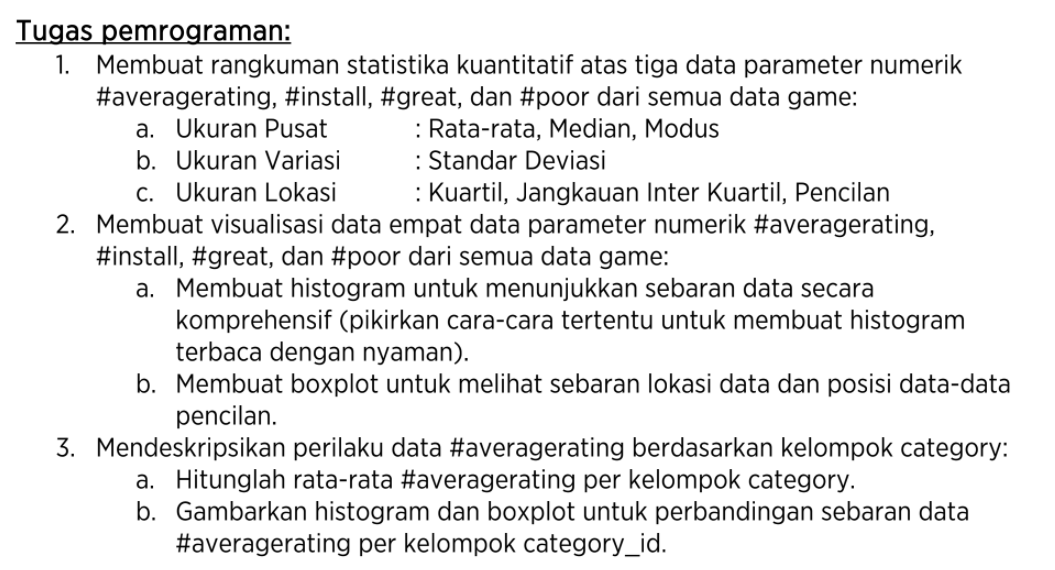)

 ## Menampilkan Dataframe baru dengan parameter-parameter yang akan di analisis saja

In [15]:
display(df)

,title,average_rating,install (K),great,poor,category
0,Garena Free Fire - The Cobra,4.33,500000.0,82.319726,14.215700,GAME ACTION
1,PUBG MOBILE: Graffiti Prank,4.24,100000.0,80.007311,16.232510,GAME ACTION
2,Mobile Legends: Bang Bang,4.08,100000.0,76.045223,19.828523,GAME ACTION
3,Brawl Stars,4.27,100000.0,81.295930,14.388945,GAME ACTION
4,Sniper 3D: Fun Free Online FPS Shooting Game,4.33,100000.0,82.755960,9.981380,GAME ACTION
...,...,...,...,...,...,...
1725,Piknik Słowo - Word Snack,4.67,1000.0,92.953607,2.896380,GAME WORD
1726,Wordox – Free multiplayer word game,4.21,1000.0,79.316699,11.844879,GAME WORD
1727,4 Fotos 1 Palavra,4.52,5000.0,88.351662,5.885119,GAME WORD
1728,زوايا - لعبة ستحرك زوايا عقلك,4.76,1000.0,93.113672,3.932324,GAME WORD


## Menampilkan Ringkasan Statistik dari DataFrame

In [16]:
describe = df.describe()
display(describe)

,average_rating,install (K),great,poor
count,1730.000000,1730.000000,1730.000000,1730.000000
mean,4.313410,28894.624277,82.200989,11.909658
std,0.253545,58100.441838,7.270490,6.183109
min,3.090000,100.000000,48.731953,0.795315
25%,4.180000,5000.000000,78.216136,7.220126
50%,4.330000,10000.000000,82.667720,11.217507
75%,4.490000,50000.000000,87.367990,15.358730
max,4.910000,1000000.000000,98.294662,43.948247


## Mencari Modus dari masing-masing parameter dataframe

In [17]:
print(df['great'])

0       82.319726
1       80.007311
2       76.045223
3       81.295930
4       82.755960
          ...    
1725    92.953607
1726    79.316699
1727    88.351662
1728    93.113672
1729    84.946315
Name: great, Length: 1730, dtype: float64


In [18]:
import statistics as stat
modus_average_rating = stat.mode(df["average_rating"])
print("modus average rating =",modus_average_rating)
modus_install = stat.mode(df["install (K)"])
print("modus install (K) =",  modus_install)
modus_great = stat.mode(df["great"])
print("modus great =",modus_great)
modus_poor = stat.mode(df["poor"])
print("modus poor =" , modus_poor)

modus average rating = 4.3
modus install (K) = 10000.0
modus great = 89.90595973219078
modus poor = 5.090760531000174


## Mencari IQR untuk masing-masing parameter

In [19]:
# IQR masing-masing kategori atau Jangkauan Interkuartil
q1 = df.describe().loc["25%"]
q3 = df.describe().loc["75%"]
iqr = q3 - q1
iqr

## Membuat Rangkuman Statistika atas parameter #averagerating, #install, #great, dan #poor

In [20]:
nomor1 = describe.iloc[[1, 5]]
nomor1 = pd.concat([nomor1, pd.DataFrame([[modus_average_rating, modus_install, modus_great, modus_poor]], index=["modus"], columns=["average_rating", "install (K)", "great", "poor"])])
nomor1 = pd.concat([nomor1, describe.iloc[[2, 4, 6]]])
nomor1 = pd.concat([nomor1, pd.DataFrame(iqr).T])
nomor1 = nomor1.rename(index= {"25%" : "Q1", "50%": "median", "75%": "Q3", 0: "IQR"})
display(nomor1)

,average_rating,install (K),great,poor
mean,4.313410,28894.624277,82.200989,11.909658
median,4.330000,10000.000000,82.667720,11.217507
modus,4.300000,10000.000000,89.905960,5.090761
std,0.253545,58100.441838,7.270490,6.183109
Q1,4.180000,5000.000000,78.216136,7.220126
Q3,4.490000,50000.000000,87.367990,15.358730
IQR,0.310000,45000.000000,9.151854,8.138604


## Mencari dan Menampilkan Pencilan masing-masing parameter

In [21]:
upperbound = q3 + (1.5 * iqr)
lowerbound = q1 - (1.5 * iqr)
print("Batas atas:")
print(upperbound)
print("\nBatas bawah:")
print(lowerbound)

Batas atas:
average_rating         4.955000
install (K)       117500.000000
great                101.095771
poor                  27.566637
dtype: float64

Batas bawah:
average_rating        3.715000
install (K)      -62500.000000
great                64.488355
poor                 -4.987781
dtype: float64


In [22]:
pencilan_avg_rt = df["average_rating"][(df["average_rating"] < lowerbound.iloc[0])|(df["average_rating"] > upperbound.iloc[0])].tolist()
pencilan_install = df["install (K)"][(df["install (K)"] < lowerbound.iloc[1])|(df["install (K)"] > upperbound.iloc[1])].tolist()
pencilan_great = df["great"][(df["great"] < lowerbound.iloc[2])|(df["great"] > upperbound.iloc[2])].tolist()
pencilan_poor = df["poor"][(df["poor"] < lowerbound.iloc[3])|(df["poor"] > upperbound.iloc[3])].tolist()

pd.DataFrame({"jenis" : ["average_rating", "install (K)", "great", "poor"],
              "jumlah pencilan" : [len(pencilan_avg_rt), len(pencilan_install), len(pencilan_great), len(pencilan_poor)],
              "pencilan" : [sorted(list(set(pencilan_avg_rt))), sorted(list(set(pencilan_install))), sorted(list(set(pencilan_great))), sorted(list(set(pencilan_poor)))]
              })

,jenis,jumlah pencilan,pencilan
0,average_rating,49,"[3.09, 3.13, 3.16, 3.2, 3.21, 3.36, 3.37, 3.39..."
1,install (K),12,"[500000.0, 1000000.0]"
2,great,42,"[48.73195295979066, 49.31699381010599, 50.4054..."
3,poor,42,"[27.777039890202325, 27.815934967891053, 27.86..."


In [23]:
df['average_rating']

In [24]:
pencilan_install = df["install (K)"][df["install (K)"] > 100000].tolist()
(pencilan_install)

[500000.0,
 500000.0,
 1000000.0,
 500000.0,
 500000.0,
 1000000.0,
 500000.0,
 500000.0,
 500000.0,
 500000.0,
 500000.0,
 500000.0]

In [25]:
df.sort_values('install (K)', ascending=False).head(12)

,title,average_rating,install (K),great,poor,category
200,Subway Surfers,4.44,1000000.0,85.590572,9.825235,GAME ARCADE
622,Candy Crush Saga,4.56,1000000.0,89.600463,5.587845,GAME CASUAL
0,Garena Free Fire - The Cobra,4.33,500000.0,82.319726,14.215700,GAME ACTION
624,My Talking Angela,4.19,500000.0,78.550867,16.481059,GAME CASUAL
1024,Hill Climb Racing,4.26,500000.0,80.067952,14.013051,GAME RACING
208,Temple Run,4.08,500000.0,74.898751,18.387042,GAME ARCADE
1332,8 Ball Pool,4.46,500000.0,87.188324,8.283168,GAME SPORTS
1424,Clash of Clans,4.49,500000.0,87.244642,8.613029,GAME STRATEGY
300,Ludo King™,4.28,500000.0,81.446822,13.460534,GAME BOARD
626,Pou,4.28,500000.0,80.448091,13.510163,GAME CASUAL


# Membuat Visualiasi Data Paramater 

## Histogram Data Parameter

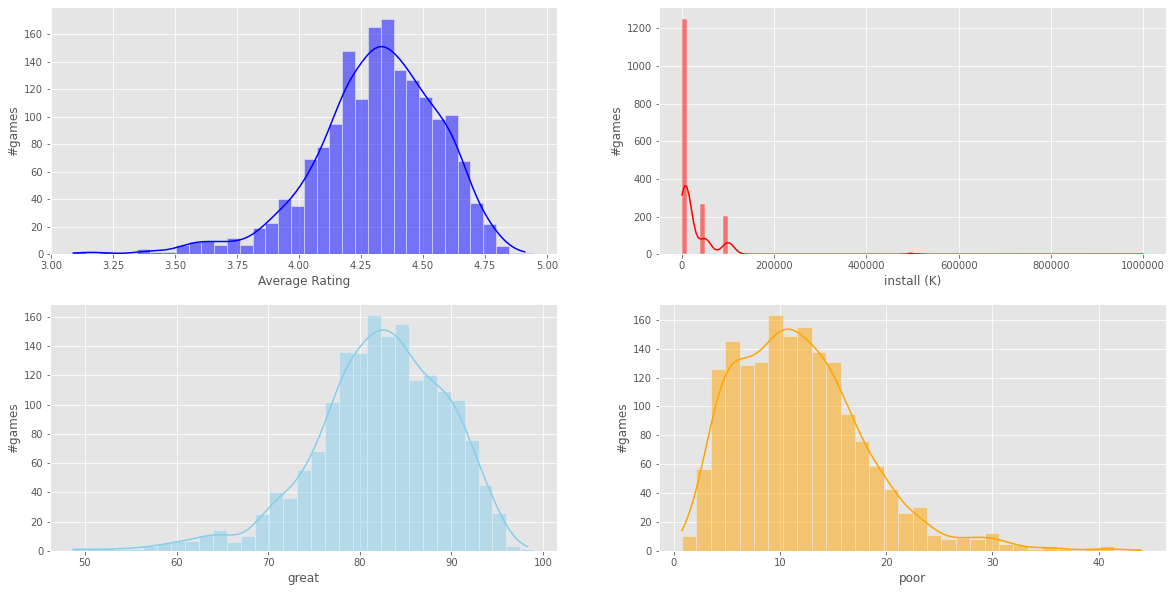

In [26]:
import seaborn as sns
average_rating_bins = 2*iqr[0]/(len(df['average_rating'])**(1/3))
average_rating_install_k = 2*iqr[1]/(len(df['install (K)'])**(1/3))
average_rating_great = 2*iqr[2]/(len(df['great'])**(1/3))
average_rating_poor = 2*iqr[3]/(len(df['poor'])**(1/3))
plt.figure(figsize=(20,10))
plt.subplot(221)
ax_1 = sns.histplot(data=df[["average_rating"]], x='average_rating',binwidth=average_rating_bins,color='blue',kde=True)
ax_1.set(xlabel='Average Rating', ylabel='#games')
plt.subplot(222)
ax_2 = sns.histplot(data=df[["install (K)"]], x='install (K)',binwidth=10000,color='red',kde=True)
ax_2.set(ylabel='#games')
plt.ticklabel_format(useOffset=False, style='plain')
plt.subplot(223)
ax_3 = sns.histplot(data=df[["great"]], x='great',binwidth=average_rating_great,color='skyblue',kde=True)
ax_3.set(ylabel='#games')
plt.subplot(224)
ax_4 = sns.histplot(data=df[["poor"]], x='poor',binwidth=average_rating_poor,color='orange',kde=True)
ax_4.set(ylabel='#games')
plt.plot()
plt.show()

## Rumus Pemilihan Bin Width Histogram

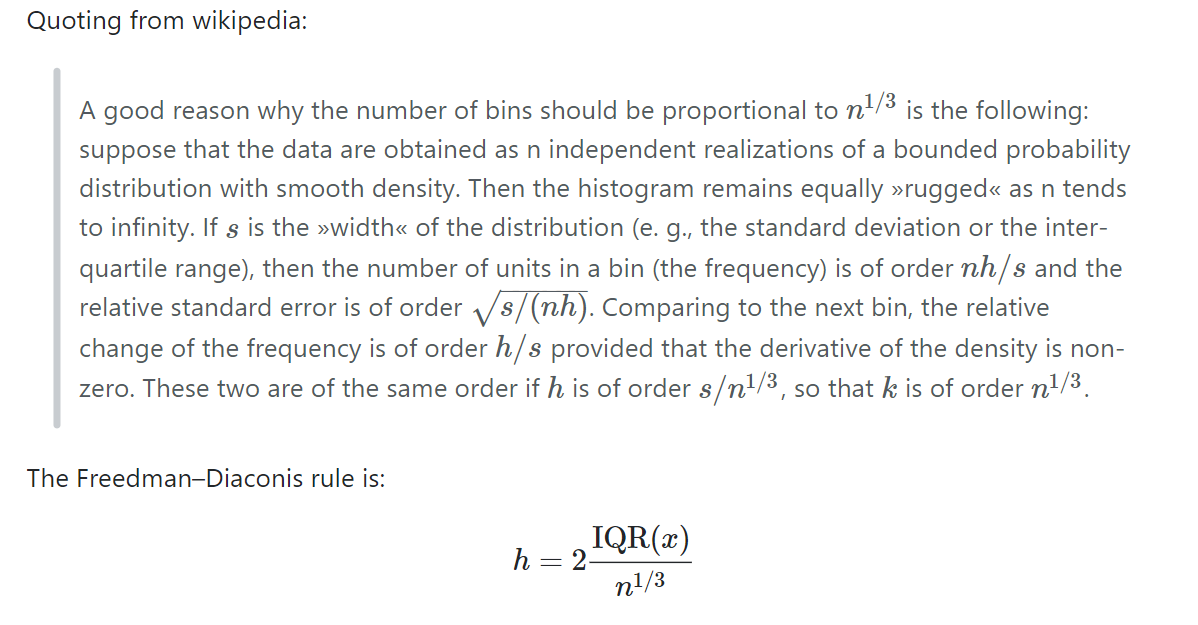

In [27]:
from IPython.display import Image
Image(filename='freedman.png')

In [28]:
df['install (K)'].value_counts().sort_values(ascending=False)

100.0          2
500.0         13
1000.0       191
5000.0       248
10000.0      795
50000.0      266
100000.0     203
500000.0      10
1000000.0      2
Name: install (K), dtype: int64


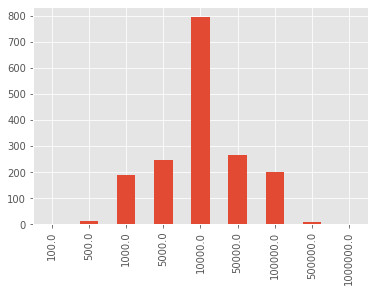

In [29]:
barplot = df["install (K)"].value_counts().sort_index()
print(barplot)
barplot.plot(kind="bar")
# fig, ax = plt.subplots()
# df.plot(ax=ax, kind='bar', xlabel="Install (K)", ylabel="Frequency")
# plt.show()

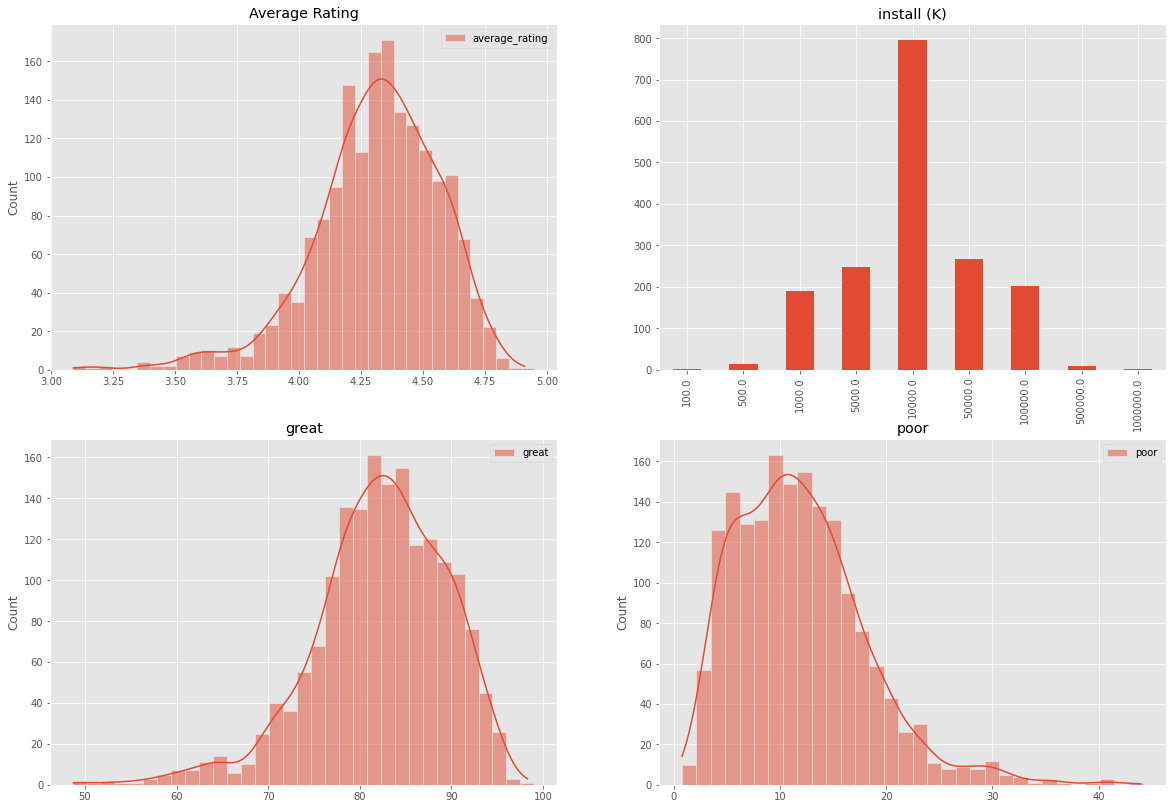

In [30]:
import seaborn as sns
average_rating_bins = 2*iqr[0]/(len(df['average_rating'])**(1/3))
average_rating_install_k = 2*iqr[1]/(len(df['install (K)'])**(1/3))
average_rating_great = 2*iqr[2]/(len(df['great'])**(1/3))
average_rating_poor = 2*iqr[3]/(len(df['poor'])**(1/3))
plt.figure(figsize=(20,14))
plt.subplot(221)
ax1 = sns.histplot(data=df[["average_rating"]],binwidth=average_rating_bins,color='blue',kde=True)
plt.title('Average Rating')
plt.subplot(222)
barplot.plot(kind="bar")
plt.title('install (K)')
plt.subplot(223)
ax2  = sns.histplot(data=df[["great"]], binwidth=average_rating_great,color='skyblue',kde=True)
plt.title('great')
plt.subplot(224)
ax3 = sns.histplot(data=df[["poor"]], binwidth=average_rating_poor,color='orange',kde=True)
plt.title('poor')
plt.plot()
plt.show()

## BoxPlot Data Parameter

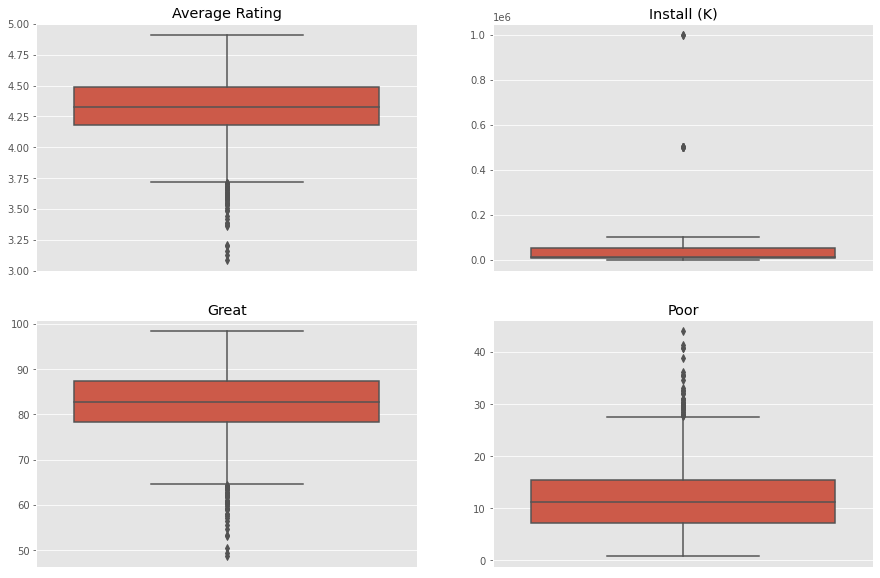

In [31]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
sns.boxplot(data=df["average_rating"])
plt.title("Average Rating")
plt.xticks([])
plt.subplot(222)
sns.boxplot(data=df["install (K)"])
plt.title("Install (K)")
plt.xticks([])
plt.subplot(223)
sns.boxplot(data=df["great"])
plt.title("Great")
plt.xticks([])
plt.subplot(224)
sns.boxplot(data=df["poor"])
plt.title("Poor")
plt.xticks([])
plt.show()

# Mendeskripsikan perilaku data #averagerating berdasarkan kelompok category

## Menyimpan Rata-Rata average rating dari masing-masing kategori Game

In [32]:
average_rating_category_mean = df.groupby('category').mean()['average_rating'].sort_values(ascending=False)
average_rating_category_mean

## Membuat Histogram untuk perbandingan sebaran data #averagerating per kelompok category 

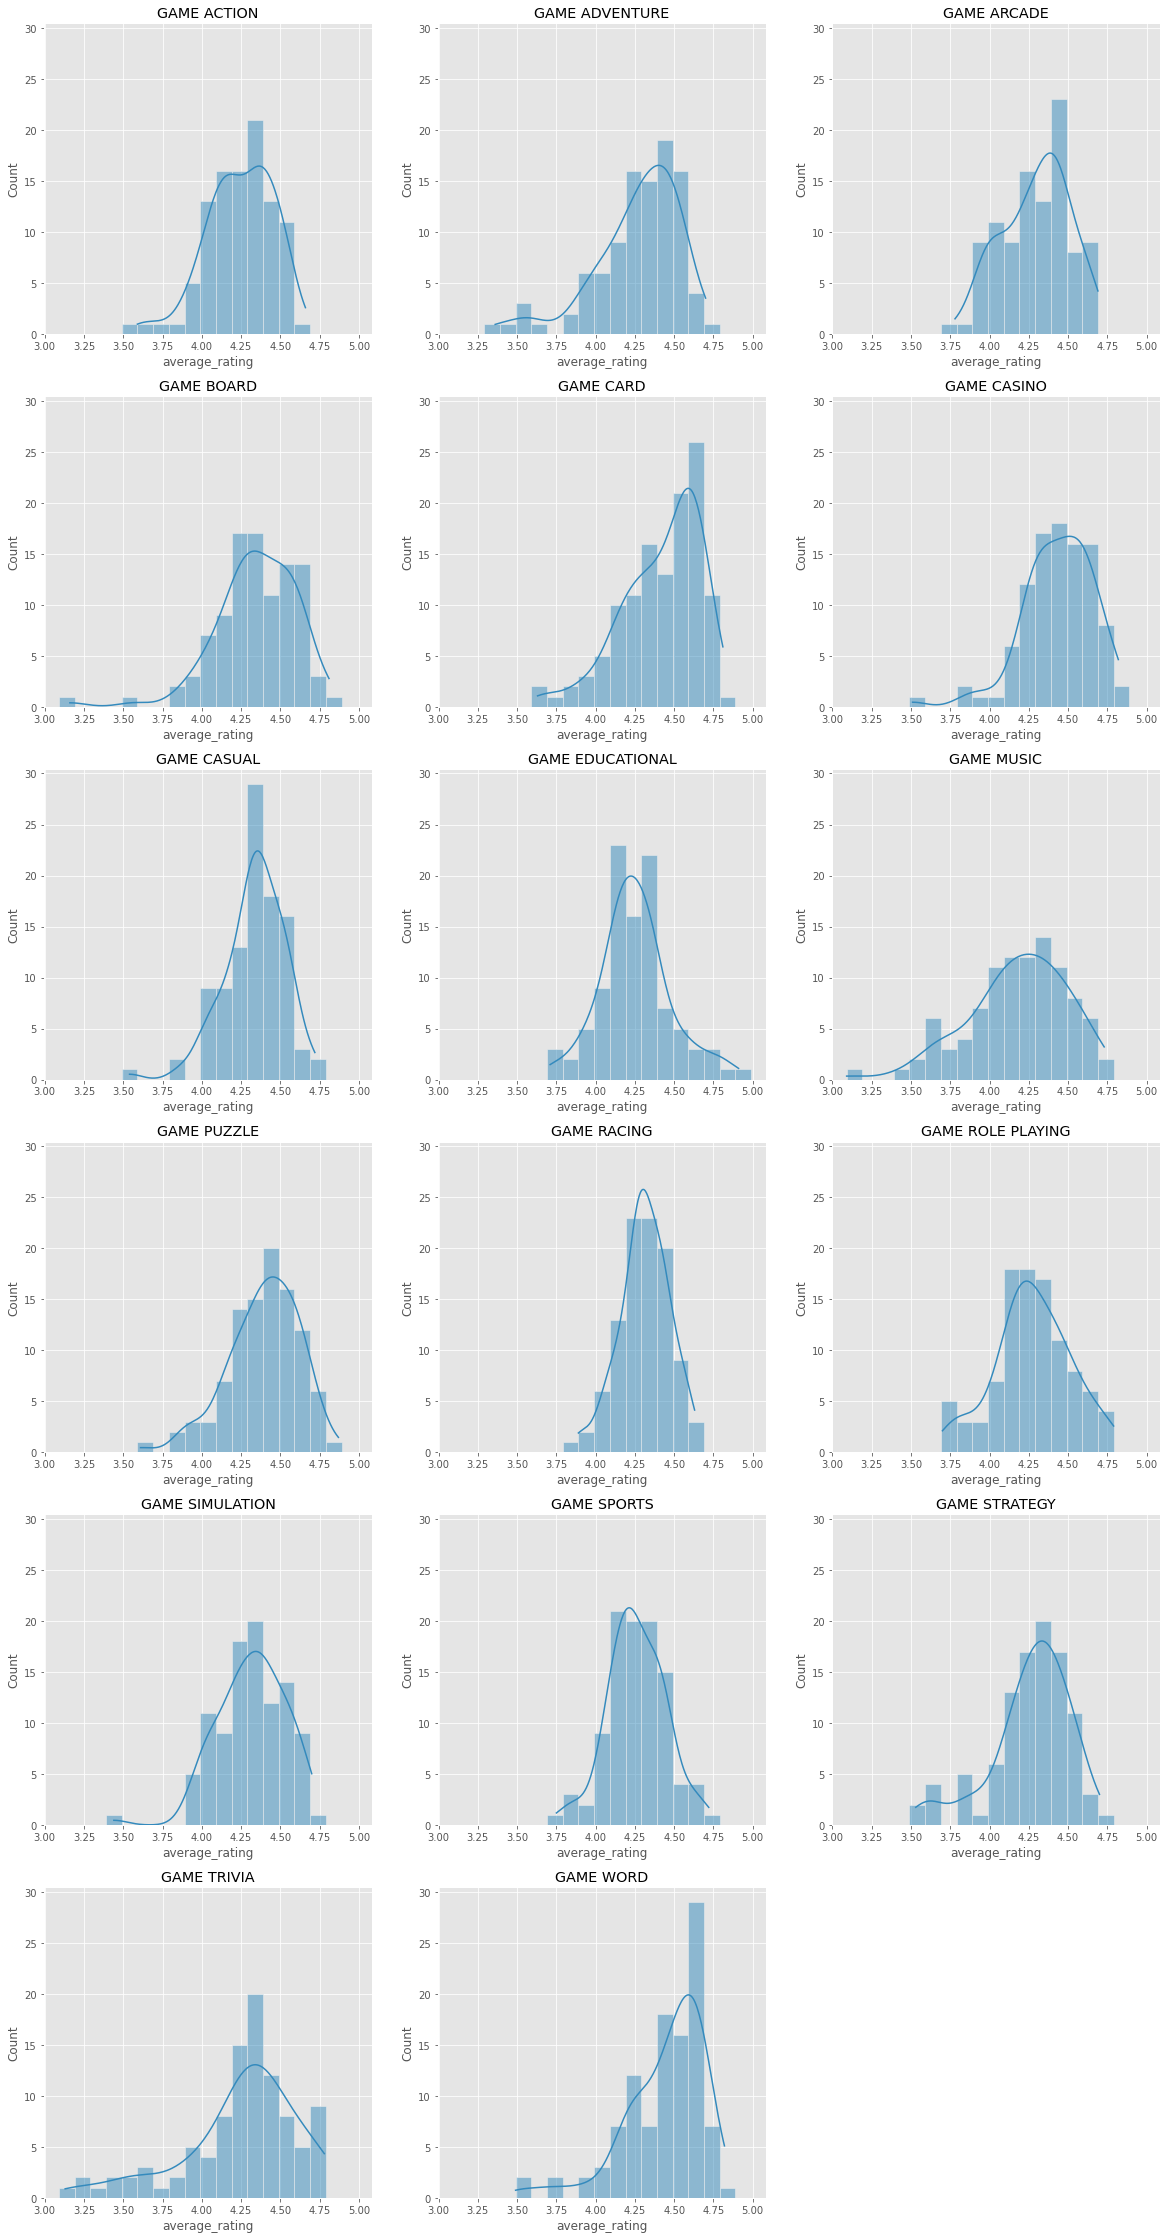

In [33]:
min_val = df["average_rating"].min()
max_val = df["average_rating"].max()
category_unique = df["category"].unique()
plt.figure(figsize = (20, 40))
ax = plt.subplot(6, 3, 1)
sns.histplot(data=df["average_rating"][(df["category"] == category_unique[0])], binrange=(min_val,max_val), binwidth=0.1,kde=True)
plt.title(category_unique[0])
for i in range(1, len(category_unique)):
    plt.subplot(6, 3, i+1, sharey= ax)
    sns.histplot(data=df["average_rating"][(df["category"] == category_unique[i])], binrange=(min_val,max_val), binwidth=0.1,kde=True)
    plt.title(category_unique[i])

## Membuat boxplot untuk perbandingan sebaran data #averagerating per kelompok category

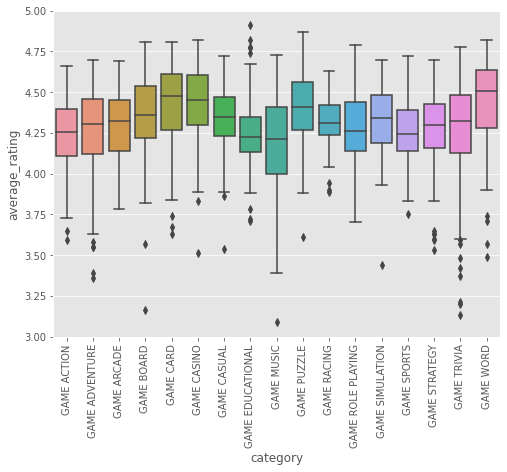

In [34]:
plt.figure(figsize=(8, 6)) #width=8, height=6
g = sns.boxplot(data=df, x="category", y="average_rating")
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


In [35]:
df

,title,average_rating,install (K),great,poor,category
0,Garena Free Fire - The Cobra,4.33,500000.0,82.319726,14.215700,GAME ACTION
1,PUBG MOBILE: Graffiti Prank,4.24,100000.0,80.007311,16.232510,GAME ACTION
2,Mobile Legends: Bang Bang,4.08,100000.0,76.045223,19.828523,GAME ACTION
3,Brawl Stars,4.27,100000.0,81.295930,14.388945,GAME ACTION
4,Sniper 3D: Fun Free Online FPS Shooting Game,4.33,100000.0,82.755960,9.981380,GAME ACTION
...,...,...,...,...,...,...
1725,Piknik Słowo - Word Snack,4.67,1000.0,92.953607,2.896380,GAME WORD
1726,Wordox – Free multiplayer word game,4.21,1000.0,79.316699,11.844879,GAME WORD
1727,4 Fotos 1 Palavra,4.52,5000.0,88.351662,5.885119,GAME WORD
1728,زوايا - لعبة ستحرك زوايا عقلك,4.76,1000.0,93.113672,3.932324,GAME WORD


In [36]:
game_fav = df.sort_values(["average_rating","install (K)","great"],ascending=False)[:int(len(df)//1000)+1]
game_fav

,title,average_rating,install (K),great,poor,category
741,超級單字王 - 英檢、多益、托福 輕鬆學,4.91,500.0,98.294662,0.795315,GAME EDUCATIONAL
956,Indy Cat for VK,4.87,5000.0,96.860754,2.073848,GAME PUZZLE


In [37]:
2 / len(df) * 100

0.11560693641618498

In [38]:


avg_great = sum(df["great"])//len(df["great"])
avg_poor = sum(df["poor"])//len(df["poor"])
avg_install = sum(df["install (K)"])//len(df["install (K)"])
avg_average_rating = sum(df["average_rating"])//len(df["average_rating"])
print(avg_great)
print(avg_poor)
print(avg_install)
print(avg_average_rating)
optimal = df[(df["average_rating"]>avg_average_rating)&(df["install (K)"]>avg_install)& (df["great"]>avg_great)& (df["poor"]<avg_poor)]
optimal

82.0
11.0
28894.0
4.0


,title,average_rating,install (K),great,poor,category
4,Sniper 3D: Fun Free Online FPS Shooting Game,4.33,100000.0,82.755960,9.981380,GAME ACTION
5,Shadow Fight 2,4.57,100000.0,88.932543,7.877291,GAME ACTION
6,Call of Duty®: Mobile - Day of Reckoning,4.47,100000.0,86.713925,9.535770,GAME ACTION
13,Bowmasters,4.55,100000.0,88.369050,7.512608,GAME ACTION
14,Standoff 2,4.54,50000.0,88.545310,8.674666,GAME ACTION
...,...,...,...,...,...,...
1640,Word search,4.46,50000.0,87.025636,5.443702,GAME WORD
1647,Word Link,4.39,50000.0,84.453210,10.190417,GAME WORD
1660,Word Search,4.46,50000.0,92.804826,3.958146,GAME WORD
1661,Word Search,4.46,50000.0,82.270377,8.873481,GAME WORD


In [39]:
# estimation_table = pd.DataFrame({"jenis" : ["average_rating", "install (K)", "estimation"],
#               "jumlah pencilan" : [len(pencilan_avg_rt), len(pencilan_install), len(pencilan_great), len(pencilan_poor)],
#               "pencilan" : [sorted(list(set(pencilan_avg_rt))), sorted(list(set(pencilan_install))), sorted(list(set(pencilan_great))), sorted(list(set(pencilan_poor)))]
#               })-
df

,title,average_rating,install (K),great,poor,category
0,Garena Free Fire - The Cobra,4.33,500000.0,82.319726,14.215700,GAME ACTION
1,PUBG MOBILE: Graffiti Prank,4.24,100000.0,80.007311,16.232510,GAME ACTION
2,Mobile Legends: Bang Bang,4.08,100000.0,76.045223,19.828523,GAME ACTION
3,Brawl Stars,4.27,100000.0,81.295930,14.388945,GAME ACTION
4,Sniper 3D: Fun Free Online FPS Shooting Game,4.33,100000.0,82.755960,9.981380,GAME ACTION
...,...,...,...,...,...,...
1725,Piknik Słowo - Word Snack,4.67,1000.0,92.953607,2.896380,GAME WORD
1726,Wordox – Free multiplayer word game,4.21,1000.0,79.316699,11.844879,GAME WORD
1727,4 Fotos 1 Palavra,4.52,5000.0,88.351662,5.885119,GAME WORD
1728,زوايا - لعبة ستحرك زوايا عقلك,4.76,1000.0,93.113672,3.932324,GAME WORD


In [40]:
estimation_table = df.sort_values(["average_rating","install (K)","great"],ascending=False)
estimation_table

,title,average_rating,install (K),great,poor,category
741,超級單字王 - 英檢、多益、托福 輕鬆學,4.91,500.0,98.294662,0.795315,GAME EDUCATIONAL
956,Indy Cat for VK,4.87,5000.0,96.860754,2.073848,GAME PUZZLE
1658,Word Collect - Free Word Games,4.82,10000.0,95.865456,3.051541,GAME WORD
575,Free Slot Machines with Bonus Games!,4.82,5000.0,95.405214,2.715167,GAME CASINO
813,Английский для Начинающих: LinDuo HD,4.82,1000.0,97.007236,1.602564,GAME EDUCATIONAL
...,...,...,...,...,...,...
1592,NEW QuizDuel!,3.21,1000.0,55.696434,38.859645,GAME TRIVIA
1606,TopQuiz -Play Quiz & Lottery | Win Money via P...,3.20,1000.0,53.296274,41.306520,GAME TRIVIA
304,모두의마블,3.16,10000.0,50.405479,40.749019,GAME BOARD
1590,스케치퀴즈,3.13,5000.0,48.731953,40.680957,GAME TRIVIA
